# Урок 2. Основные распределения вероятностей, использующиеся при анализе данных

## Домашнее задание  
Сделайте описательные статистики с визуализацией для нескольких дискретных и непрерывных величин на ваш выбор.

Постройте гистограммы распределения значений имеющихся у вас переменных, предположите лежащий в их основе вид распределения.

Для тех, кто хочет заморочиться: придумайте, как привести к нормальному распределению те непрерывные величины, которые у вас распределены ненормально.

Задание выполняется на языке R и предоставляется в формате html/PDF рендера Quarto ноутбука или Google Colab (последнее предпочтительно).

### Чтение файлов

In [1]:
install.packages("tidyverse")
install.packages("readxl")
install.packages("writexl")
install.packages("skimr")
install.packages("psych")
install.packages("gridExtra")
install.packages("moments")
install.packages("fitdistrplus")
install.packages("data.table")
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abin

In [3]:
library(tidyverse)
library(dplyr)
require(readxl)
library(writexl)
library(skimr)
library(psych)
library(ggplot2)
library(gridExtra)
library(moments)
library(fitdistrplus)
library(data.table)

In [4]:
library(fitdistrplus)

In [5]:
library(car)

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:psych’:

    logit


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




> **Колонки ```Vial.number``` и	```Patient.number``` оставили в клинических данных для более точного объединения с таблицей ```lipids```

In [6]:
clinical <- read.csv("/content/21_2_files/clinical.csv")
clinical

Vial.number,Patient.number,Group,Age,Plasma.volume,Ht,Wt,BMI,Sys,Dia,⋯,r.lat.max,r.ant.max,r.pos.max,l.lat.max,l.ant.max,l.pos.max,carotid.IMT.mean,Plaque,Statins,comorbidities
<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
1,50,0,63,6.5,163,84.0,31.61579,125,76,⋯,0.65,0.80,0.80,0.81,0.78,0.80,0.6425000,1,1,NA
2,51,0,47,5.5,179,111.0,34.64311,125,82,⋯,1.03,0.92,1.03,1.03,1.03,1.09,0.8400000,1,0,NA
3,52,1,57,7.0,164,80.0,29.74420,132,80,⋯,1.00,0.90,0.95,0.85,0.90,0.90,0.8500000,3,1,Type 2 diabetes mellitus; MI - 2016
4,53,1,72,5.0,160,58.8,22.96875,130,90,⋯,0.91,0.97,0.98,0.86,0.74,0.80,0.8241667,2,0,1-2 times per year hypertensive crises (Corinfar)
5,54,1,57,5.0,180,71.0,21.91358,135,75,⋯,1.20,1.20,1.25,1.10,1.30,1.13,1.0983333,1,1,NA
6,55,1,79,6.2,160,64.0,25.00000,110,75,⋯,0.88,0.80,0.90,1.07,1.00,1.30,0.8475000,2,0,"Cholecystitis, gastritis without exacerbation. Diffuse focal changes in the thyroid gland"
7,56,1,61,6.5,164,67.0,24.91077,124,82,⋯,0.91,0.86,0.86,0.80,0.74,0.91,0.6725000,1,0,chronic cholecystitis
8,57,1,70,5.5,162,61.0,23.24341,135,78,⋯,1.00,1.00,1.00,0.94,0.69,0.87,0.7850000,1,0,"Cholecystectomy 20 years ago, hr.gastritis"
9,58,0,50,6.0,150,79.0,35.11111,142,95,⋯,1.09,1.26,1.03,0.80,0.74,0.75,0.8491667,1,0,Iron-deficiency anemia


In [7]:
lipids <- read.csv("/content/21_2_files/lipids.csv")
lipids

Vial.number,Patient.number,GPHDL1,GPHDL2,GPHDL3,GPHDL4,GPHDL5,GPHDL6,GPHDL7,GPHDL8,⋯,G1.LDLi,G2.LDLi,G3.LDLi,S0.LDLi,S1.LDLi,S2.LDLi,S3.LDLi,B.LDLi,F.LDLi,HM.LDLi
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,50,0.3800000,1.780000,0.1400000,0.05000000,0.730000,2.900000,1.570000,2.570000,⋯,4.090,68.910,3.570,3.980,28.180,42.460,1.950,0.020,1.67,13.02
3,52,0.4300000,1.300000,0.2300000,0.05000000,0.590000,2.620000,1.620000,3.860000,⋯,5.160,68.220,3.110,4.640,30.430,39.860,1.560,0.020,1.69,14.16
4,53,0.4100000,3.860000,0.3100000,0.10000000,0.960000,3.190000,2.420000,3.750000,⋯,3.950,68.030,4.500,3.780,29.370,41.130,2.200,0.020,1.89,13.89
5,54,0.5000000,1.790000,0.2300000,0.06000000,0.770000,2.960000,1.760000,3.000000,⋯,4.630,66.910,4.030,4.440,28.540,40.640,1.950,0.020,2.03,14.25
6,55,0.4000000,3.690000,0.1700000,0.03000000,0.800000,3.040000,1.620000,3.230000,⋯,4.050,64.010,5.270,3.720,26.710,40.390,2.510,0.020,2.70,16.06
7,56,0.3700000,2.960000,0.2200000,0.05000000,1.000000,3.000000,2.110000,3.060000,⋯,4.100,65.990,4.700,4.030,28.440,39.990,2.330,0.020,1.61,13.82
8,57,0.5600000,2.760000,0.4600000,0.08000000,1.110000,2.960000,3.560000,4.170000,⋯,5.270,67.260,3.240,4.690,32.270,37.290,1.520,0.030,1.61,14.59
9,58,0.4100000,2.140000,0.2200000,0.12000000,0.930000,2.550000,2.060000,2.950000,⋯,3.970,67.590,4.220,4.420,27.990,41.190,2.180,0.050,1.55,13.26
10,59,0.4200000,1.710000,0.2000000,0.06000000,0.640000,2.840000,1.590000,3.480000,⋯,4.480,68.880,4.040,3.860,28.110,43.200,2.230,0.020,2.30,13.11


In [8]:
data <- full_join(clinical, lipids, by = c("Vial.number", "Patient.number"), suffix = c("_clin", "_lip"))
data

Vial.number,Patient.number,Group,Age,Plasma.volume,Ht,Wt,BMI,Sys,Dia,⋯,G1.LDLi,G2.LDLi,G3.LDLi,S0.LDLi,S1.LDLi,S2.LDLi,S3.LDLi,B.LDLi,F.LDLi,HM.LDLi
<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,50,0,63,6.5,163,84.0,31.61579,125,76,⋯,4.090,68.910,3.570,3.980,28.180,42.460,1.950,0.020,1.67,13.02
2,51,0,47,5.5,179,111.0,34.64311,125,82,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,52,1,57,7.0,164,80.0,29.74420,132,80,⋯,5.160,68.220,3.110,4.640,30.430,39.860,1.560,0.020,1.69,14.16
4,53,1,72,5.0,160,58.8,22.96875,130,90,⋯,3.950,68.030,4.500,3.780,29.370,41.130,2.200,0.020,1.89,13.89
5,54,1,57,5.0,180,71.0,21.91358,135,75,⋯,4.630,66.910,4.030,4.440,28.540,40.640,1.950,0.020,2.03,14.25
6,55,1,79,6.2,160,64.0,25.00000,110,75,⋯,4.050,64.010,5.270,3.720,26.710,40.390,2.510,0.020,2.70,16.06
7,56,1,61,6.5,164,67.0,24.91077,124,82,⋯,4.100,65.990,4.700,4.030,28.440,39.990,2.330,0.020,1.61,13.82
8,57,1,70,5.5,162,61.0,23.24341,135,78,⋯,5.270,67.260,3.240,4.690,32.270,37.290,1.520,0.030,1.61,14.59
9,58,0,50,6.0,150,79.0,35.11111,142,95,⋯,3.970,67.590,4.220,4.420,27.990,41.190,2.180,0.050,1.55,13.26


In [9]:
names(data)

[1] "Vial.number"      "Patient.number"   "Group"           
  [4] "Age"              "Plasma.volume"    "Ht"              
  [7] "Wt"               "BMI"              "Sys"             
 [10] "Dia"              "PR"               "Sm"              
 [13] "Dm"               "HT"               "LVH"             
 [16] "IHD"              "MI"               "Str"             
 [19] "A_C"              "A_H"              "A_D"             
 [22] "Choi...25"        "Tgi...26"         "HDLi...27"       
 [25] "LDLi...28"        "Choi...29"        "Tgi...30"        
 [28] "HDLi...31"        "LDLi...32"        "AI"              
 [31] "r.lat.min"        "r.ant.min"        "r.pos.min"       
 [34] "l.lat.min"        "l.ant.min"        "l.pos.min"       
 [37] "r.lat.max"        "r.ant.max"        "r.pos.max"       
 [40] "l.lat.max"        "l.ant.max"        "l.pos.max"       
 [43] "carotid.IMT.mean" "Plaque"           "Statins"         
 [46] "comorbidities"    "GPHDL1"           "GPHDL2"          
 [49] "GPHDL3"           "GPHDL4"           "GPHDL5"          
 [52] "GPHDL6"           "GPHDL7"           "GPHDL8"          
 [55] "GPHDL9"           "GPHDL10"          "GPHDL11"         
 [58] "GPHDL12"          "GPHDL13"          "GPHDL14"         
 [61] "GPHDL15"          "GPHDL16"          "GPHDL17"         
 [64] "GPHDL18"          "GPHDL19"          "GPHDL20"         
 [67] "GPHDL21"          "GPHDL22"          "sum_auc.HDLi"    
 [70] "LB.HDLi"          "HB.HDLi"          "G1.HDLi"         
 [73] "G2.HDLi"          "G3.HDLi"          "S0.HDLi"         
 [76] "S1.HDLi"          "S2.HDLi"          "S3.HDLi"         
 [79] "B.HDLi"           "F.HDLi"           "HM.HDLi"         
 [82] "GPLDL1"           "GPLDL2"           "GPLDL3"          
 [85] "GPLDL4"           "GPLDL5"           "GPLDL6"          
 [88] "GPLDL7"           "GPLDL8"           "GPLDL9"          
 [91] "GPLDL10"          "GPLDL11"          "GPLDL12"         
 [94] "GPLDL13"          "GPLDL14"          "GPLDL15"         
 [97] "GPLDL16"          "GPLDL17"          "GPLDL18"         
[100] "GPLDL19"          "GPLDL20"          "GPLDL21"         
[103] "GPLDL22"          "sum_auc.LDLi"     "LB.LDLi"         
[106] "HB.LDLi"          "G1.LDLi"          "G2.LDLi"         
[109] "G3.LDLi"          "S0.LDLi"          "S1.LDLi"         
[112] "S2.LDLi"          "S3.LDLi"          "B.LDLi"          
[115] "F.LDLi"           "HM.LDLi"

In [10]:
data <- data %>%
  dplyr::select(-Patient.number, -comorbidities)
data

Vial.number,Group,Age,Plasma.volume,Ht,Wt,BMI,Sys,Dia,PR,⋯,G1.LDLi,G2.LDLi,G3.LDLi,S0.LDLi,S1.LDLi,S2.LDLi,S3.LDLi,B.LDLi,F.LDLi,HM.LDLi
<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,63,6.5,163,84.0,31.61579,125,76,67,⋯,4.090,68.910,3.570,3.980,28.180,42.460,1.950,0.020,1.67,13.02
2,0,47,5.5,179,111.0,34.64311,125,82,65,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,1,57,7.0,164,80.0,29.74420,132,80,92,⋯,5.160,68.220,3.110,4.640,30.430,39.860,1.560,0.020,1.69,14.16
4,1,72,5.0,160,58.8,22.96875,130,90,68,⋯,3.950,68.030,4.500,3.780,29.370,41.130,2.200,0.020,1.89,13.89
5,1,57,5.0,180,71.0,21.91358,135,75,70,⋯,4.630,66.910,4.030,4.440,28.540,40.640,1.950,0.020,2.03,14.25
6,1,79,6.2,160,64.0,25.00000,110,75,66,⋯,4.050,64.010,5.270,3.720,26.710,40.390,2.510,0.020,2.70,16.06
7,1,61,6.5,164,67.0,24.91077,124,82,84,⋯,4.100,65.990,4.700,4.030,28.440,39.990,2.330,0.020,1.61,13.82
8,1,70,5.5,162,61.0,23.24341,135,78,72,⋯,5.270,67.260,3.240,4.690,32.270,37.290,1.520,0.030,1.61,14.59
9,0,50,6.0,150,79.0,35.11111,142,95,88,⋯,3.970,67.590,4.220,4.420,27.990,41.190,2.180,0.050,1.55,13.26


In [11]:
summary(data)
options(width = 140)

  Vial.number        Group             Age        Plasma.volume   
 Min.   : 1.00   Min.   :0.0000   Min.   :47.00   Min.   : 5.000  
 1st Qu.:10.25   1st Qu.:0.0000   1st Qu.:60.25   1st Qu.: 6.500  
 Median :19.50   Median :1.0000   Median :65.00   Median :10.250  
 Mean   :19.50   Mean   :0.6316   Mean   :65.58   Mean   : 9.453  
 3rd Qu.:28.75   3rd Qu.:1.0000   3rd Qu.:70.00   3rd Qu.:11.875  
 Max.   :38.00   Max.   :1.0000   Max.   :83.00   Max.   :13.000  
                                                                  
       Ht              Wt              BMI             Sys       
 Min.   :150.0   Min.   : 56.50   Min.   :20.28   Min.   :100.0  
 1st Qu.:161.0   1st Qu.: 63.25   1st Qu.:23.00   1st Qu.:121.0  
 Median :165.0   Median : 72.50   Median :27.68   Median :132.0  
 Mean   :165.0   Mean   : 74.86   Mean   :27.55   Mean   :131.7  
 3rd Qu.:168.8   3rd Qu.: 83.50   3rd Qu.:30.29   3rd Qu.:136.8  
 Max.   :180.0   Max.   :111.00   Max.   :38.87   Max.   :188.0  
  

**Переведем колонки в ```Factor``` и ```Numeric```:**

In [22]:
# Создадим список колонок, которые мы переведем в Factor
factor_cols <- c("Vial.number", "Group", "Sm", "Dm", "HT", "LVH", "IHD", "MI", "Str", "A_C", "A_H", "A_D", "Plaque", "Statins")

In [23]:
# Напишем функцию, которая переведет колонки в Factor и Numeric

convert_columns <- function(data, columns) {
  data <- mutate(data, across(!all_of(columns), as.numeric),
                        across(all_of(columns), as.factor))
  return(data)
}

In [24]:
# Применим функцию к нашей объединённой таблице
data <- convert_columns(data, factor_cols)
data

Vial.number,Group,Age,Plasma.volume,Ht,Wt,BMI,Sys,Dia,PR,⋯,G1.LDLi,G2.LDLi,G3.LDLi,S0.LDLi,S1.LDLi,S2.LDLi,S3.LDLi,B.LDLi,F.LDLi,HM.LDLi
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,63,6.5,163,84.0,31.61579,125,76,67,⋯,4.090,68.910,3.570,3.980,28.180,42.460,1.950,0.020,1.67,13.02
2,0,47,5.5,179,111.0,34.64311,125,82,65,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,1,57,7.0,164,80.0,29.74420,132,80,92,⋯,5.160,68.220,3.110,4.640,30.430,39.860,1.560,0.020,1.69,14.16
4,1,72,5.0,160,58.8,22.96875,130,90,68,⋯,3.950,68.030,4.500,3.780,29.370,41.130,2.200,0.020,1.89,13.89
5,1,57,5.0,180,71.0,21.91358,135,75,70,⋯,4.630,66.910,4.030,4.440,28.540,40.640,1.950,0.020,2.03,14.25
6,1,79,6.2,160,64.0,25.00000,110,75,66,⋯,4.050,64.010,5.270,3.720,26.710,40.390,2.510,0.020,2.70,16.06
7,1,61,6.5,164,67.0,24.91077,124,82,84,⋯,4.100,65.990,4.700,4.030,28.440,39.990,2.330,0.020,1.61,13.82
8,1,70,5.5,162,61.0,23.24341,135,78,72,⋯,5.270,67.260,3.240,4.690,32.270,37.290,1.520,0.030,1.61,14.59
9,0,50,6.0,150,79.0,35.11111,142,95,88,⋯,3.970,67.590,4.220,4.420,27.990,41.190,2.180,0.050,1.55,13.26


In [15]:
# Сохраним полученную таблицу в файл
write_xlsx(data, "/content/21_2_files/data.xlsx")

In [16]:
# Выведем статистику с помощью skimr
library(skimr)
num_desc_stats <- skimr::skim(data, where(is.numeric))

In [17]:
options(width = 200)
print(num_desc_stats)

── Data Summary ────────────────────────
                           Values
Name                       data  
Number of rows             38    
Number of columns          114   
_______________________          
Column type frequency:           
  numeric                  100   
________________________         
Group variables            None  

── Variable type: numeric ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
    skim_variable    n_missing complete_rate     mean      sd      p0     p25     p50     p75    p100 hist 
  1 Age                      0         1      65.6     8.67    47      60.2    65      70      83     ▂▅▇▅▃
  2 Plasma.volume            0         1       9.45    2.88     5       6.5    10.2    11.9    13     ▆▂▁▅▇
  3 Ht                       0         1     165       6.31   150     161     165     169.    180     ▁▇▇▅▂
  4 Wt             

In [18]:
num_fact_stats <- skimr::skim(data, where(is.factor))
options(width = 200)
print(num_fact_stats)

── Data Summary ────────────────────────
                           Values
Name                       data  
Number of rows             38    
Number of columns          114   
_______________________          
Column type frequency:           
  factor                   14    
________________________         
Group variables            None  

── Variable type: factor ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   skim_variable n_missing complete_rate ordered n_unique top_counts              
 1 Vial.number           0         1     FALSE         38 1: 1, 2: 1, 3: 1, 4: 1  
 2 Group                 0         1     FALSE          2 1: 24, 0: 14            
 3 Sm                    0         1     FALSE          2 0: 35, 1: 3             
 4 Dm                    0         1     FALSE          2 0: 34, 1: 4             
 5 HT                    0         1

In [19]:
# Сохраним в файлы
write_xlsx(num_desc_stats, "/content/21_2_files/desc_stats_numeric.xlsx")
write_xlsx(num_fact_stats, "/content/21_2_files/desc_stats_factor.xlsx")

In [26]:
# Выведем описательную статистику по всем Numeric столбцам с помощью psych::describe и сохраним в файл
desc_stats <- data %>%
  dplyr::select(where(is.numeric)) %>%
  map_df(~ psych::describe(.))

rownames(desc_stats) <- colnames(data)[sapply(data, where(is.numeric))]

print(desc_stats)
write_xlsx(desc_stats, "/content/21_2_files/desc_stats_psych.xlsx")

                 vars  n   mean    sd median trimmed   mad    min    max  range  skew kurtosis   se
Age                 1 38  65.58  8.67  65.00   65.66  7.41  47.00  83.00  36.00  0.04    -0.66 1.41
Plasma.volume       1 38   9.45  2.88  10.25    9.52  4.08   5.00  13.00   8.00 -0.28    -1.60 0.47
Ht                  1 38 165.00  6.31 165.00  164.81  5.93 150.00 180.00  30.00  0.27     0.16 1.02
Wt                  1 38  74.86 14.25  72.50   73.70 14.83  56.50 111.00  54.50  0.72    -0.34 2.31
BMI                 1 38  27.55  5.23  27.68   27.31  6.68  20.28  38.87  18.58  0.41    -1.01 0.85
Sys                 1 38 131.74 16.02 132.00  130.94 11.86 100.00 188.00  88.00  0.96     2.51 2.60
Dia                 1 38  80.08 10.83  80.00   80.16  7.41  57.00 105.00  48.00  0.04    -0.24 1.76
PR                  1 38  73.66  8.57  73.00   73.41  8.15  54.00  92.00  38.00  0.30    -0.34 1.39
Choi...25           1 38 240.61 41.17 240.00  239.50 46.70 164.00 322.00 158.00  0.11    -0.85 6.68


### Гистограммы непрерывных переменных

In [29]:
# Функция для создания гистограмм для каждого столбца из таблицы data
create_histogram <- function(data, binwidth = 1) {
  numeric_columns <- dplyr::select(data, where(is.numeric))
  histograms <- list()  # Создаем пустой список для хранения гистограмм
  for (column in colnames(numeric_columns)) {
    # Фильтрация строк без пропущенных значений
    filtered_data <- data[complete.cases(data[column]), ]

    # Создаем гистограмму и сохраняем ее в списке
    histograms[[column]] <- ggplot(filtered_data, aes(x = !!sym(column))) +
      geom_histogram(binwidth = binwidth, fill = "skyblue", color = "black", bins = 30) +
      # geom_vline(aes(xintercept = median(filtered_data[[column]]), color = "Median"), linetype = "dashed", linewidth = 1) +
      # geom_vline(aes(xintercept = mean(filtered_data[[column]]), color = "Mean"), linetype = "dashed", linewidth = 1) +
      # geom_vline(aes(xintercept = mode(filtered_data[[column]]), color = "Mode"), linetype = "dashed", linewidth = 1) +
      geom_density(color = "red") +
      labs(title = paste("Гистограмма дисперсии значений", column),
           x = column,
           y = "Частота")
      theme_minimal(base_size = 24) +  # Increase base font size
      theme(plot.title = element_text(size = 27))  # Increase title font size
  }
  return(histograms)  # Возвращаем список гистограмм
}

In [30]:
# Построение гистограмм
histograms <- create_histogram(data, binwidth = 0.01)

print(histograms)

Output hidden; open in https://colab.research.google.com to view.

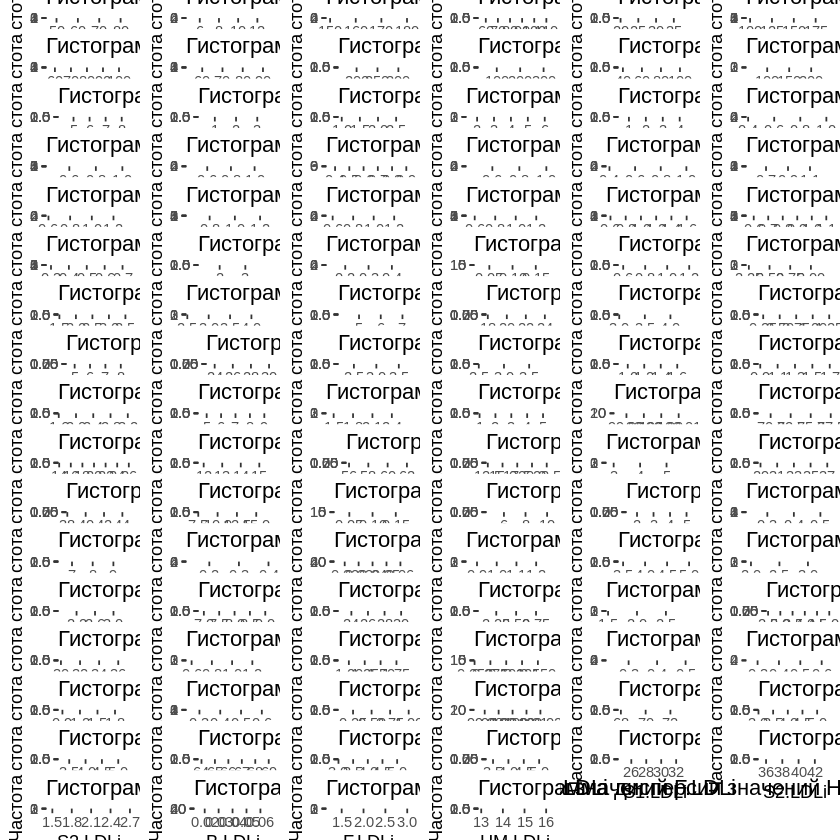

In [31]:
# Отображение гистограмм

# grid.arrange(grobs = histograms, ncol = 4, heights = unit(rep(1, ceiling(length(histograms) / 2)), "null"))
grid.arrange(grobs = histograms, ncol = 6,
              heights = c(14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14),
              widths = c(20, 20, 20, 20, 20, 20))

> Вывод grid увеличить в Colab не получилось(

**Напишем функцию, строющую гистограммы для каждого столбца из ```data``` и определяющую тип распределения по параметрам гистограммы**

In [34]:
# Функция для создания гистограмм и определения распределения
create_histogram <- function(data, binwidth = 1) {
  numeric_columns <- dplyr::select(data, where(is.numeric))
  histograms <- list()  # Создаем пустой список для хранения гистограмм
  for (column in colnames(numeric_columns)) {
    # Фильтрация строк без пропущенных значений
    filtered_data <- data[complete.cases(data[column]), ]

    # Создаем гистограмму
    hist <- ggplot(filtered_data, aes(x = !!sym(column))) +
      geom_histogram(binwidth = binwidth, fill = "skyblue", color = "black") +
      geom_density(color = "red") +
      labs(title = paste("Гистограмма дисперсии значений", column),
           x = column,
           y = "Частота") +
      theme_minimal(base_size = 14) +  # Increase base font size
      theme(plot.title = element_text(size = 18))  # Increase title font size

    # Определяем тип распределения
    dist <- identify_distribution_by_histogram(filtered_data[[column]])
    dist_text <- paste("Распределение:", dist)

    # Добавляем текст с типом распределения к гистограмме
    hist <- hist + annotate("text", x = Inf, y = Inf, label = dist_text, vjust = 1, hjust = 1)

    # Сохраняем гистограмму в списке
    histograms[[column]] <- hist
  }
  return(histograms)  # Возвращаем список гистограмм
}

identify_distribution_by_histogram <- function(column) {
  # Количество бинов для гистограммы
  n_bins <- 30
  hist_data <- hist(column, breaks = n_bins, plot = FALSE)
  # Подсчет частот в бинах
  frequencies <- hist_data$counts
  # Проверка на одинаковую частоту во всех бинах (равномерное распределение)
  if (all(diff(frequencies) == 0)) {
    return("Равномерное")
  }
  # Проверка на симметричность
  skewness <- moments::skewness(column)
  if (abs(skewness) < 0.5) {  # Выбираем пороговое значение 0.5 для определения симметричности
    return("Симметричное")
  }
  # Проверка на нормальное распределение
  shapiro_test <- shapiro.test(column)
  if (shapiro_test$p.value > 0.05) {
    return("Нормальное")
  }
  # Проверка на экспоненциальное распределение
  exp_params <- suppressWarnings(MASS::fitdistr(column, "exponential"))
  if (!is.null(exp_params$estimate) && all(exp_params$estimate > 0)) {
    return("Экспоненциальное")
  }
  # Проверка на логнормальное распределение
  if (shapiro_test$p.value <= 0.05) {
    return("Лог-нормальное")
  }
  # По умолчанию возвращаем неизвестный тип распределения
  return("Неизвестно")
}

In [35]:
histograms <- create_histogram(data, binwidth = 0.01)
print(histograms)

Output hidden; open in https://colab.research.google.com to view.

In [36]:
# Функция для построения гистограмм для каждого столбца в данных
plot_histograms <- function(data) {
  # Проходим по каждому столбцу в данных
  for (col in names(data)) {
    # Игнорируем столбцы с типом "factor" и NA
    if (class(data[[col]]) == "factor" || any(is.na(data[[col]]))) {
      next
    }

    # Создаем гистограмму
    p <- ggplot(data, aes_string(x = col)) +
      geom_histogram(binwidth = 0.1, fill = "skyblue", color = "black") +
      ggtitle(paste("Гистограмма значений", col)) +
      labs(x = col, y = "Частота") +
      theme_minimal(base_size = 16) +  # Увеличить базовый размер шрифта
      theme(plot.title = element_text(size = 20))  # Увеличить размер шрифта заголовка

    # Печать гистограммы
    print(p)
  }
}

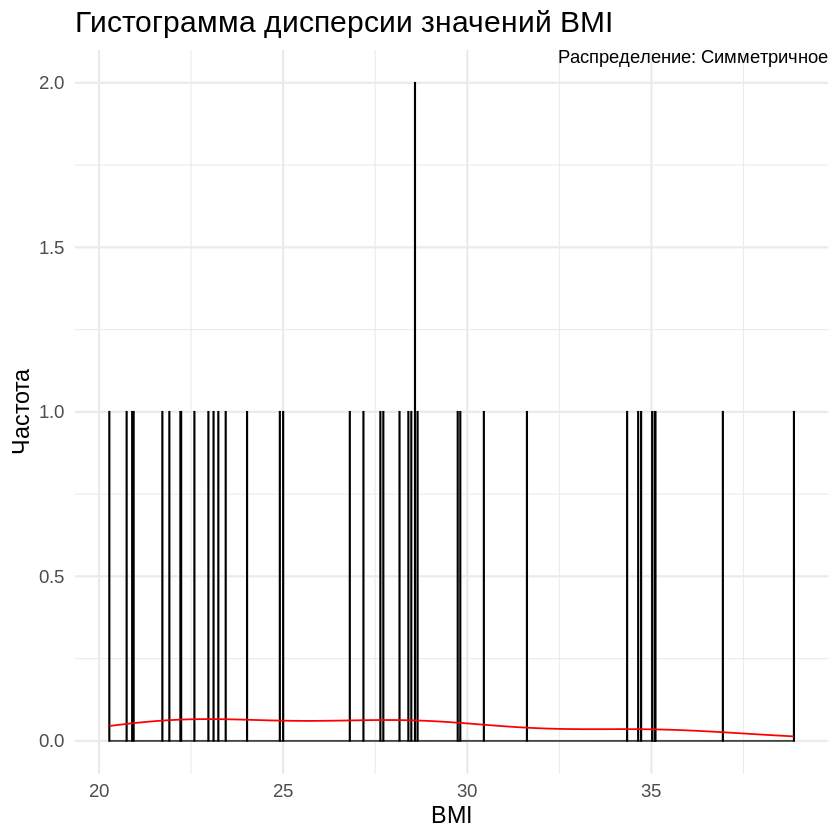

In [37]:
histograms[["BMI"]]

In [38]:
plot_histogram <- function(data, column_name, binwidth = 0.1) {
  # Выбираем нужный столбец из таблицы
  column <- data[[column_name]]

  # Удаляем пропущенные значения, если они есть
  column <- column[complete.cases(column)]

  # Построение гистограммы
  ggplot(data.frame(x = column), aes(x)) +
    geom_histogram(binwidth = binwidth, fill = "skyblue", color = "black", stat = "count") +
    geom_density(color = "red") +
    labs(title = paste("Гистограмма значений столбца", column_name),
         x = column_name,
         y = "Частота") +
    theme_minimal(base_size = 16) +  # Увеличить базовый размер шрифта
    theme(plot.title = element_text(size = 20))  # Увеличить размер шрифта заголовка
}

Warning message in geom_histogram(binwidth = binwidth, fill = "skyblue", color = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”
Warning message in geom_histogram(binwidth = binwidth, fill = "skyblue", color = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


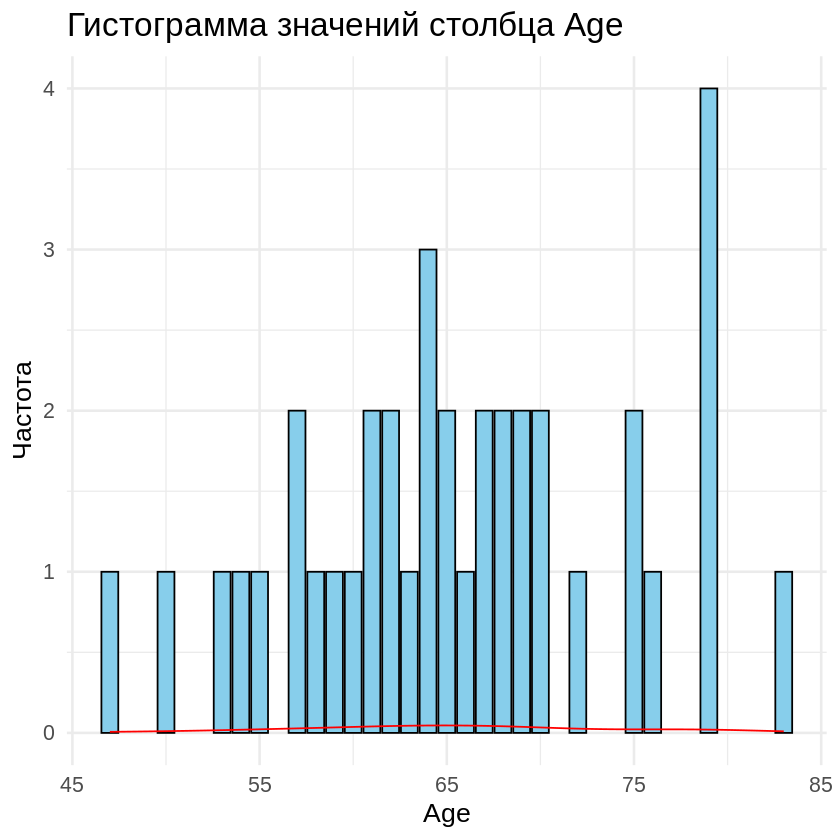

Warning message in geom_histogram(binwidth = binwidth, fill = "skyblue", color = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


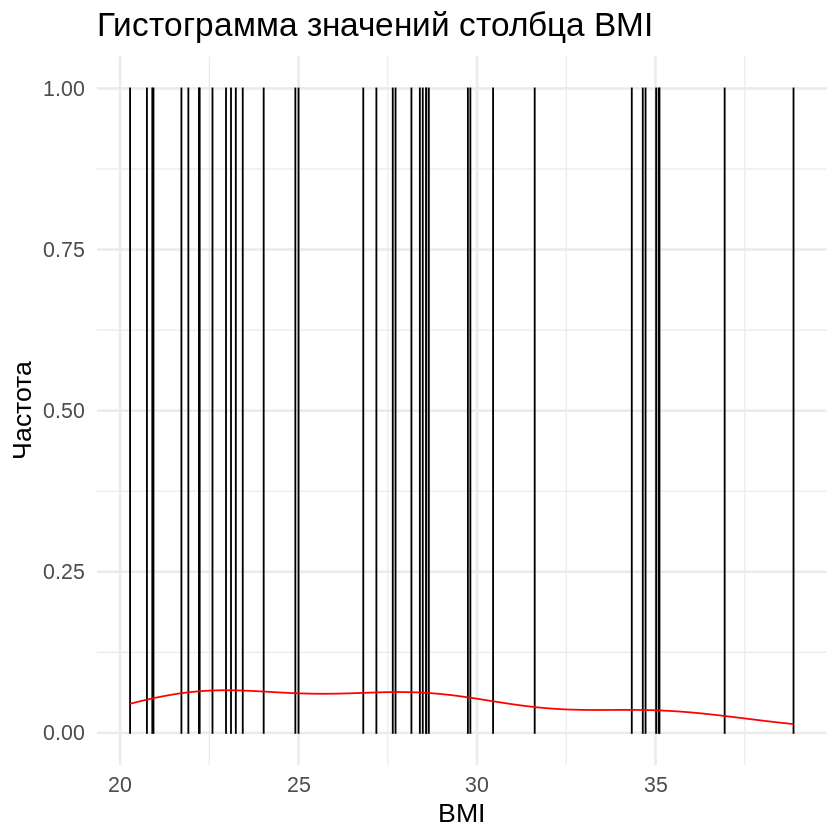

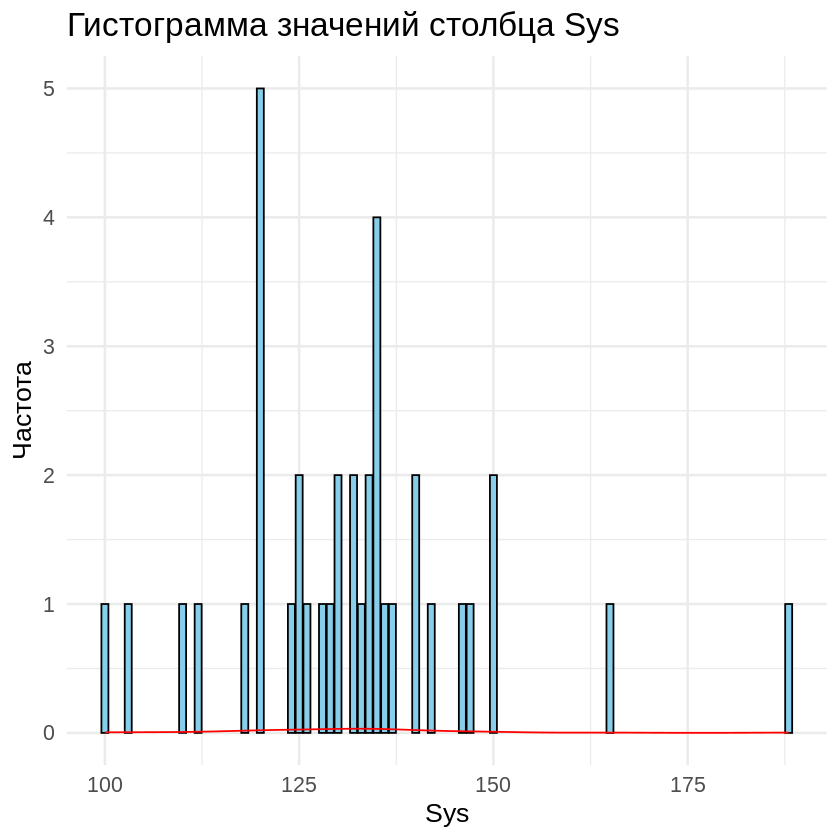

In [39]:
plot_histogram(data, "Age", binwidth = 1)
plot_histogram(data, "BMI", binwidth = 1)
plot_histogram(data, "Sys", binwidth = 1)

> Распределение значений столбцов "Возраст", "ИМТ", "Систолическое давление" визуально похожи на равномерное.

Warning message in geom_histogram(binwidth = binwidth, fill = "skyblue", color = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


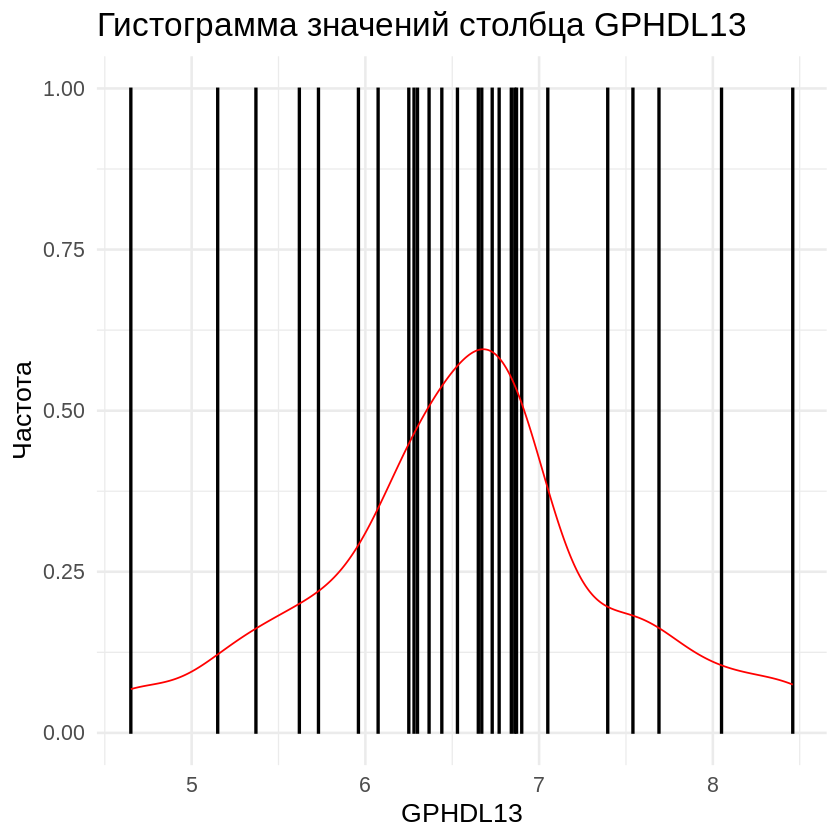

In [40]:
plot_histogram(data, "GPHDL13", binwidth = 0.01)

> Кривая плотности значений столбца "GPHDL13" похожа на распределение Стьюдента
.

Fitting of the distribution ' norm ' by maximum likelihood 
Parameters : 
     estimate Std. Error
mean 74.85526   2.281197
sd   14.06224   1.613050
Loglikelihood:  -154.3724   AIC:  312.7448   BIC:  316.02 
Correlation matrix:
     mean sd
mean    1  0
sd      0  1


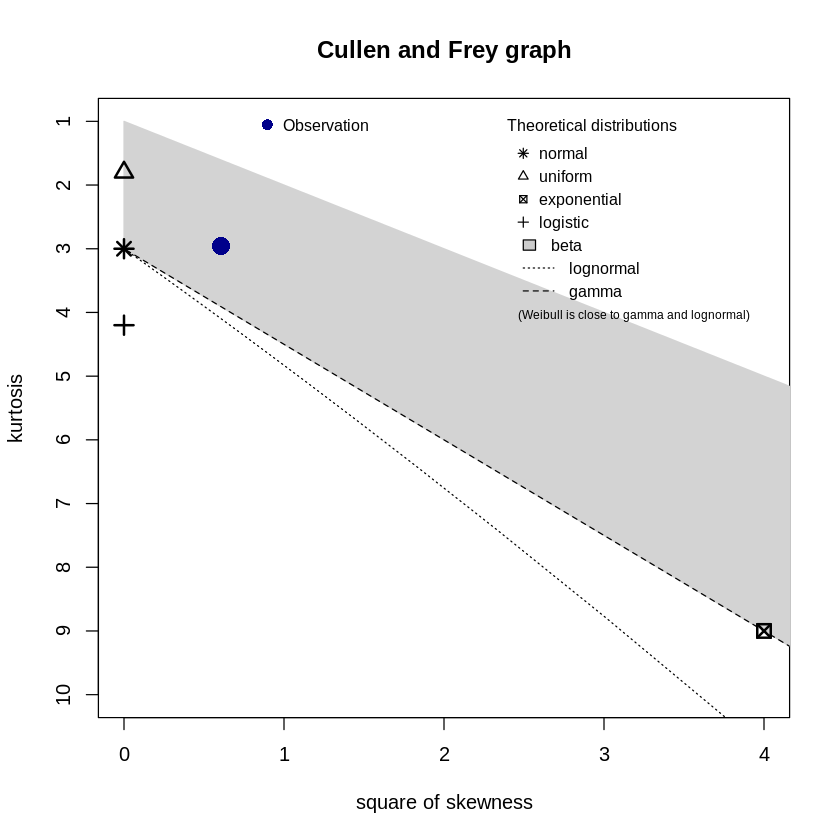

In [41]:
desc <- descdist(data$Wt, discrete = FALSE)

best_fit <- fitdist(data$Wt, "norm")
summary(best_fit)


	Shapiro-Wilk normality test

data:  data$Wt
W = 0.93095, p-value = 0.02149


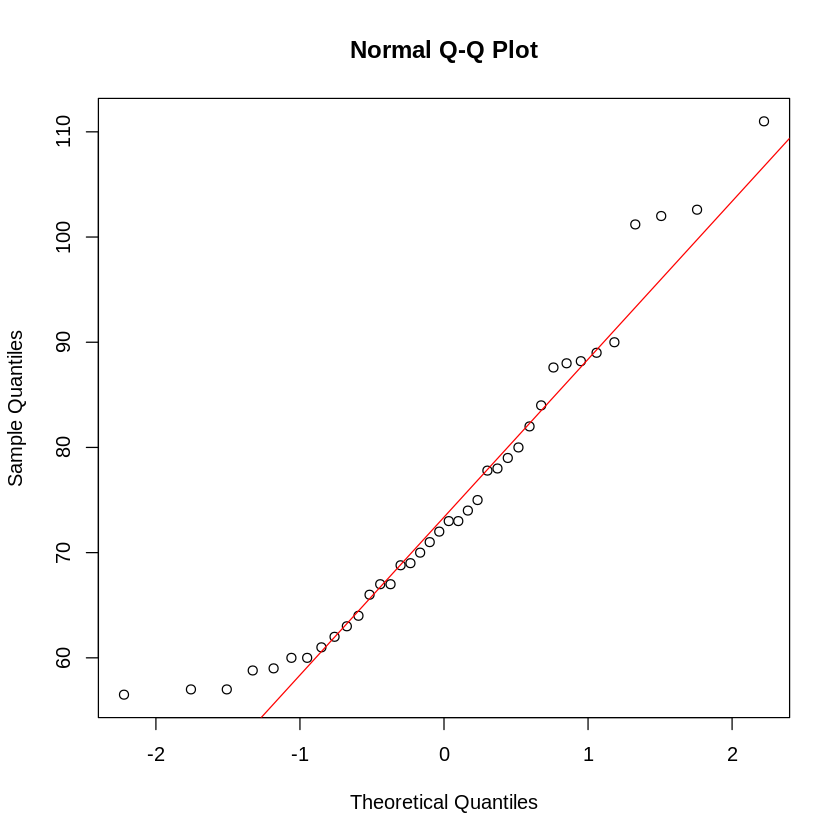

In [42]:
# Построение QQ-графика для переменной Wt
qqnorm(data$Wt)
qqline(data$Wt, col = "red")

# Тест Шапиро-Уилка на нормальность данных
shapiro.test(data$Wt)

Fitting of the distribution ' logis ' by maximum likelihood 
Parameters : 
           estimate Std. Error
location 130.930638   2.242502
scale      8.126431   1.122572
Loglikelihood:  -156.5729   AIC:  317.1458   BIC:  320.421 
Correlation matrix:
            location       scale
location 1.000000000 0.008763418
scale    0.008763418 1.000000000


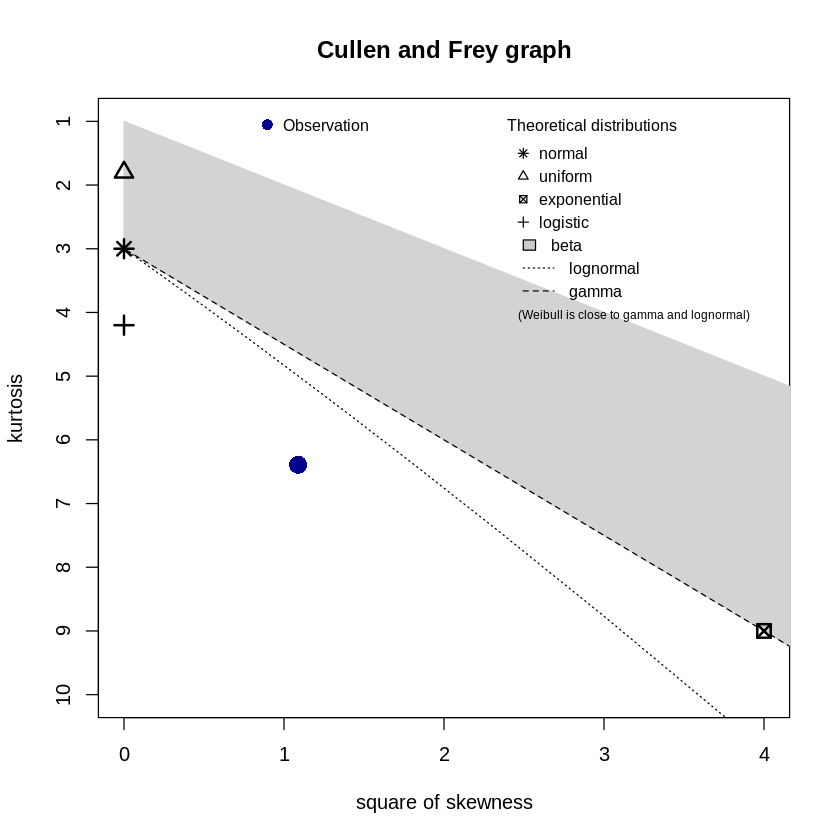

In [43]:
desc <- descdist(data$Sys, discrete = FALSE)

best_fit <- fitdist(data$Sys, "logis")
summary(best_fit)

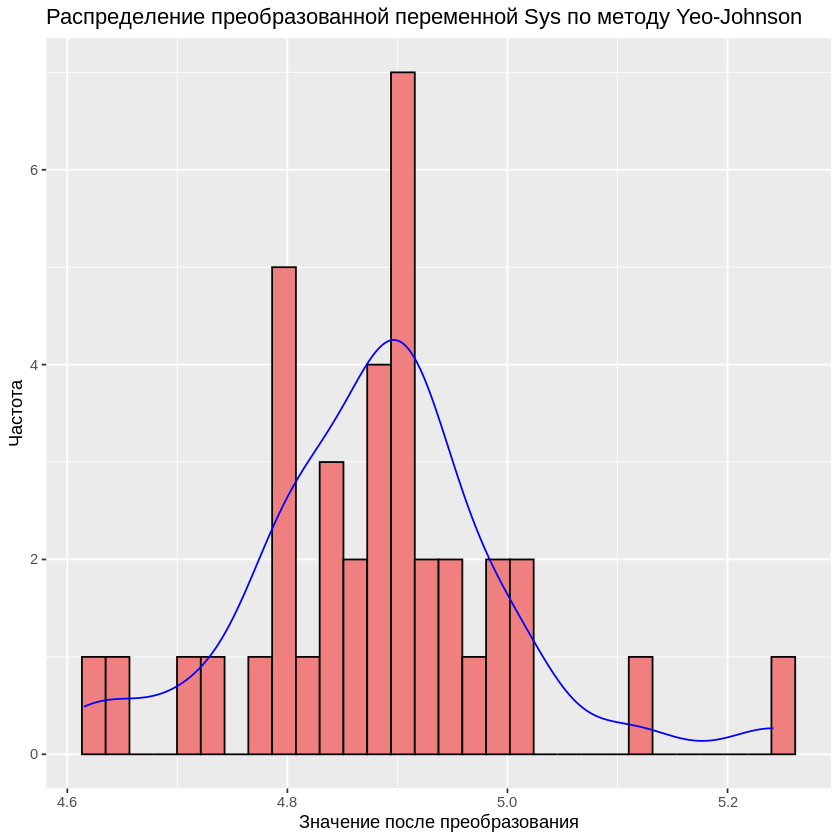

In [44]:
# Попробуем проеобразование Йео-Джонсона для переменной Sys

yj_Sys <- yjPower(data$Sys, 0)

# Построим график преобразованной переменной Sys
ggplot(data, aes(x = yj_Sys)) +
  geom_histogram(fill = "lightcoral", color = "black", bins = 30) +
  geom_density(color = "blue") +
  labs(title = "Распределение преобразованной переменной Sys по методу Yeo-Johnson", x = "Значение после преобразования", y = "Частота")

In [48]:
# Список всех распределений
possible_distributions <- c("norm", "lnorm", "exp", "gamma", "weibull", "logis", "pois")

In [49]:
fits <- lapply(possible_distributions, function(dist) fitdist(data$Sys, dist))

results_summary <- lapply(fits, summary)
results_summary

[[1]]
Fitting of the distribution ' norm ' by maximum likelihood 
Parameters : 
      estimate Std. Error
mean 131.73684   2.565131
sd    15.81253   1.813821
Loglikelihood:  -158.8302   AIC:  321.6603   BIC:  324.9355 
Correlation matrix:
     mean sd
mean    1  0
sd      0  1


[[2]]
Fitting of the distribution ' lnorm ' by maximum likelihood 
Parameters : 
         estimate Std. Error
meanlog 4.8739290 0.01886955
sdlog   0.1163197 0.01333835
Loglikelihood:  -157.3753   AIC:  318.7505   BIC:  322.0257 
Correlation matrix:
              meanlog         sdlog
meanlog  1.000000e+00 -1.788355e-12
sdlog   -1.788355e-12  1.000000e+00


[[3]]
Fitting of the distribution ' exp ' by maximum likelihood 
Parameters : 
        estimate  Std. Error
rate 0.007590891 0.001209585
Loglikelihood:  -223.4706   AIC:  448.9413   BIC:  450.5789 

[[4]]
Fitting of the distribution ' gamma ' by maximum likelihood 
Parameters : 
        estimate Std. Error
shape 72.8704139 16.6743128
rate   0.5531571  0.12700

In [50]:
# col <- complete.cases(data$GPLDL17)

# fits <- lapply(possible_distributions, function(dist) fitdist(col, dist))

# results_summary <- lapply(fits, summary)
# results_summary

check_distrib_type <- function(data, possible_distributions) {
  numeric_columns <- select_if(data, is.numeric)
  results_summary <- list()  # Создаем пустой список для хранения
  for (column in colnames(numeric_columns)) {
    # Фильтрация строк без пропущенных значений
    filtered_data <- data[complete.cases(data[column]), , drop = FALSE]  # Убедимся, что возвращается фрейм данных

    # Проверяем распределение для каждого столбца
    column_summaries <- list()
    for (dist in possible_distributions) {
      fit <- fitdist(filtered_data[[column]], dist)
      column_summaries[[dist]] <- summary(fit)
    }
    results_summary[[column]] <- column_summaries
  }
  return(results_summary)
}

In [51]:
# v 2.0
check_distrib_type_2 <- function(data, possible_distributions) {
  numeric_columns <- select_if(data, is.numeric)
  results_summary <- list()  # Создаем пустой список для хранения
  for (column in colnames(numeric_columns)) {
    # Фильтрация строк без пропущенных значений
    filtered_data <- data[complete.cases(data[column]), , drop = FALSE]  # Убедимся, что возвращается фрейм данных

    # Проверяем распределение для каждого столбца
    column_summaries <- list()
    for (dist in possible_distributions) {
      tryCatch({
        fit <- fitdist(filtered_data[[column]], dist, start = list(mean = mean(filtered_data[[column]]), sd = sd(filtered_data[[column]])))
        column_summaries[[dist]] <- summary(fit)
      }, error = function(e) {
        column_summaries[[dist]] <- paste("Error:", e)
      })
    }
    results_summary[[column]] <- column_summaries
  }
  return(results_summary)
}


In [52]:
check_distrib_type_2(data, possible_distributions)

$Age
$Age$norm
Fitting of the distribution ' norm ' by maximum likelihood 
Parameters : 
      estimate Std. Error
mean 65.579663  1.3880820
sd    8.556712  0.9812563
Loglikelihood:  -135.5017   AIC:  275.0035   BIC:  278.2786 
Correlation matrix:
             mean           sd
mean 1.0000000000 0.0001181738
sd   0.0001181738 1.0000000000



$Plasma.volume
$Plasma.volume$norm
Fitting of the distribution ' norm ' by maximum likelihood 
Parameters : 
     estimate Std. Error
mean 9.452897  0.4604456
sd   2.838377  0.3256542
Loglikelihood:  -93.55704   AIC:  191.1141   BIC:  194.3893 
Correlation matrix:
             mean           sd
mean 1.0000000000 0.0001324586
sd   0.0001324586 1.0000000000



$Ht
$Ht$norm
Fitting of the distribution ' norm ' by maximum likelihood 
Parameters : 
       estimate Std. Error
mean 165.000340  1.0095074
sd     6.223021  0.7136795
Loglikelihood:  -123.3987   AIC:  250.7974   BIC:  254.0726 
Correlation matrix:
             mean           sd
mean 1.000000e+

In [53]:
check_distrib_type_3 <- function(data, possible_distributions) {
  numeric_columns <- select_if(data, is.numeric)
  results_summary <- list()  # Создаем пустой список для хранения
  for (column in colnames(numeric_columns)) {
    cat("Analyzing column:", column, "\n")
    # Фильтрация строк без пропущенных значений
    filtered_data <- data[complete.cases(data[column]), , drop = FALSE]  # Убедимся, что возвращается фрейм данных

    # Проверяем распределение для каждого столбца
    column_summaries <- data.table(Distribution = character(), Loglikelihood = double(), AIC = double(), BIC = double())
    for (dist in possible_distributions) {
      cat("Fitting distribution:", dist, "to column:", column, "\n")
      try({
        fit <- fitdist(filtered_data[[column]], dist, start = list(mean = mean(filtered_data[[column]]), sd = sd(filtered_data[[column]])))
        summary_df <- as.data.table(summary(fit)$parameters)
        summary_df <- cbind(Distribution = dist, summary_df)
        summary_df <- summary_df[, c("Distribution", "Loglikelihood", "AIC", "BIC")]  # Выбираем только нужные столбцы
        column_summaries <- rbind(column_summaries, summary_df)
      }, silent = TRUE)
    }
    results_summary[[column]] <- column_summaries
  }
  return(results_summary)
}


In [54]:
check_distrib_type_3(data, possible_distributions)

Analyzing column: Age 
Fitting distribution: norm to column: Age 
Fitting distribution: lnorm to column: Age 
Fitting distribution: exp to column: Age 
Fitting distribution: gamma to column: Age 
Fitting distribution: weibull to column: Age 
Fitting distribution: logis to column: Age 
Fitting distribution: pois to column: Age 
Analyzing column: Plasma.volume 
Fitting distribution: norm to column: Plasma.volume 
Fitting distribution: lnorm to column: Plasma.volume 
Fitting distribution: exp to column: Plasma.volume 
Fitting distribution: gamma to column: Plasma.volume 
Fitting distribution: weibull to column: Plasma.volume 
Fitting distribution: logis to column: Plasma.volume 
Fitting distribution: pois to column: Plasma.volume 
Analyzing column: Ht 
Fitting distribution: norm to column: Ht 
Fitting distribution: lnorm to column: Ht 
Fitting distribution: exp to column: Ht 
Fitting distribution: gamma to column: Ht 
Fitting distribution: weibull to column: Ht 
Fitting distribution: logi

Distribution,Loglikelihood,AIC,BIC
<chr>,<dbl>,<dbl>,<dbl>
Distribution,Loglikelihood,AIC,BIC
<chr>,<dbl>,<dbl>,<dbl>
Distribution,Loglikelihood,AIC,BIC
<chr>,<dbl>,<dbl>,<dbl>
Distribution,Loglikelihood,AIC,BIC
<chr>,<dbl>,<dbl>,<dbl>
Distribution,Loglikelihood,AIC,BIC
<chr>,<dbl>,<dbl>,<dbl>
Distribution,Loglikelihood,AIC,BIC


In [57]:
# Применяем fitdist к каждому распределению
fits <- lapply(possible_distributions, function(dist) fitdist(data$Dia, dist))

# Создаем таблицу, в которую будем добавлять результаты
results_table <- NULL

# Проходимся по результатам и добавляем их в таблицу
for (i in seq_along(fits)) {
  # Извлекаем результаты
  distribution <- possible_distributions[i]
  summary_result <- summary(fits[[i]])

  # Создаем временную таблицу
  temp_table <- cbind(Distribution = distribution, summary_result$estimate, summary_result$`Std. Error`, Loglikelihood = summary_result$loglik,
                      AIC = summary_result$aic, BIC = summary_result$bic)

  # Присоединяем временную таблицу к общей таблице
  if (is.null(results_table)) {
    results_table <- temp_table
  } else {
    results_table <- rbind(results_table, temp_table)
  }
}

# Выводим таблицу результатов
results_table

,Distribution,,Loglikelihood,AIC,BIC
mean,norm,80.0789473684211,-143.945830861883,291.891661723767,295.16683404322
sd,norm,10.6878720715717,-143.945830861883,291.891661723767,295.16683404322
meanlog,lnorm,4.37390014764004,-144.336019191837,292.672038383673,295.947210703126
sdlog,lnorm,0.136078631664214,-144.336019191837,292.672038383673,295.947210703126
rate,exp,0.0124876766434584,-204.554493626482,411.108987252964,412.746573412691
shape,gamma,55.0221650424564,-144.091952646238,292.183905292476,295.459077611929
rate,gamma,0.687084621670194,-144.091952646238,292.183905292476,295.459077611929
shape,weibull,8.05383380731205,-145.13094618603,294.26189237206,297.537064691513
scale,weibull,84.7668900926023,-145.13094618603,294.26189237206,297.537064691513
location,logis,79.9847459697962,-144.14353912284,292.28707824568,295.562250565133


Warning message in geom_histogram(binwidth = binwidth, fill = "skyblue", color = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


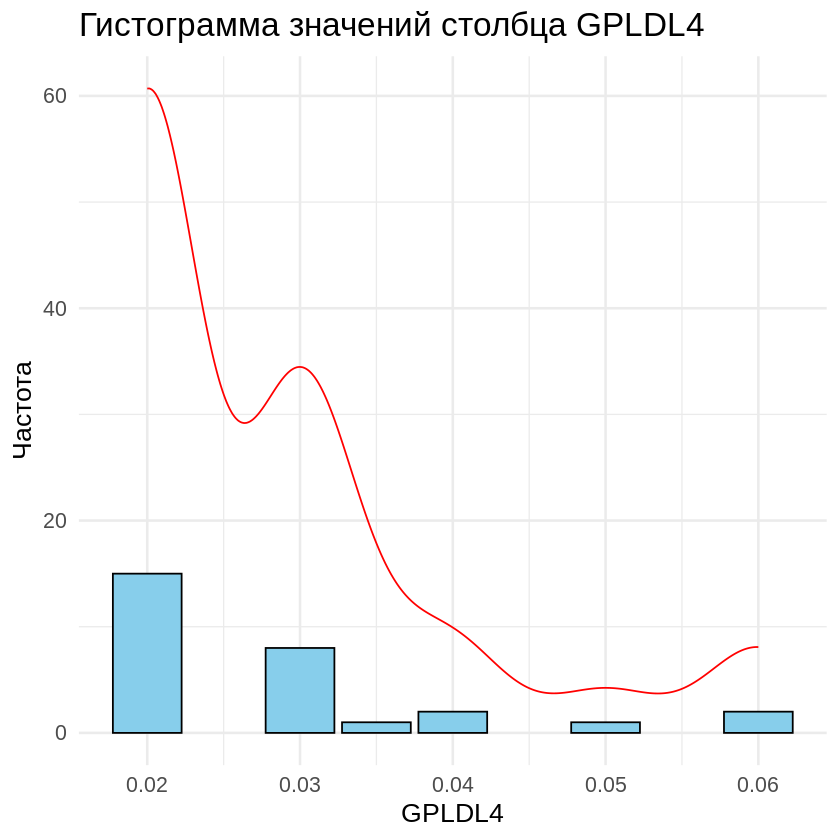

In [61]:
plot_histogram(data, "GPLDL4", binwidth = 0.01)

> Значения столбца "GPLDL4" имеют экспоненциальное распределение.

**Генерация гамма-распределения**

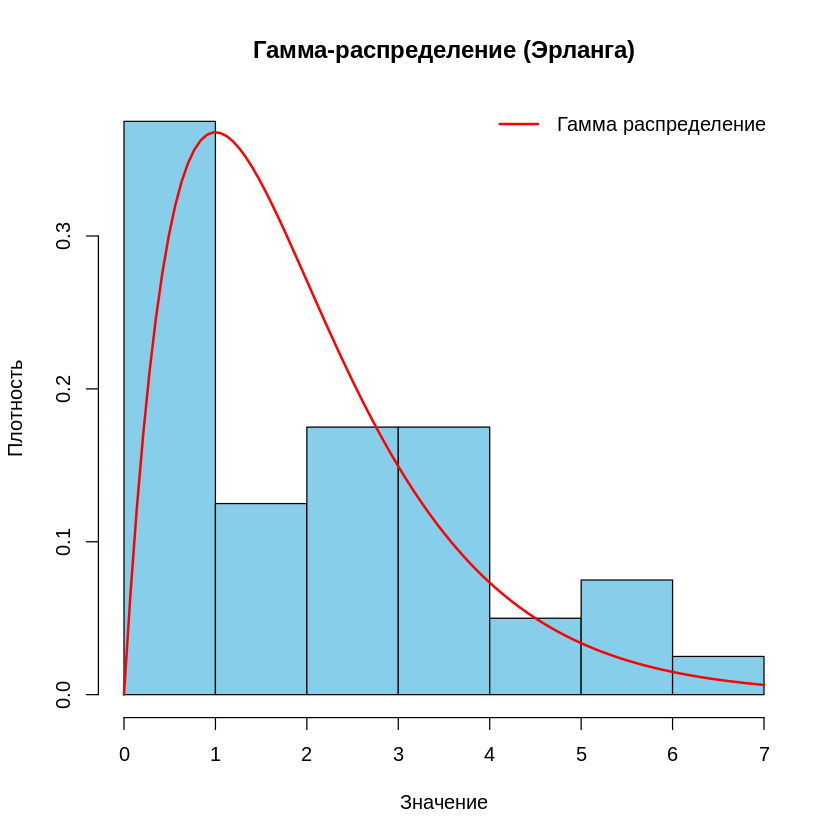

In [62]:
# Задаем параметры распределения
alpha <- 2
beta <- 1

# Генерируем 1000 случайных значений из гамма-распределения
gamma_data <- rgamma(40, shape = alpha, rate = beta)

# Строим гистограмму данных
hist(gamma_data, freq = FALSE, col = "skyblue", main = "Гамма-распределение (Эрланга)", xlab = "Значение", ylab = "Плотность")

# Построение функции плотности вероятности гамма-распределения
curve(dgamma(x, shape = alpha, rate = beta), add = TRUE, col = "red", lwd = 2, ylab = "Плотность")

# Добавляем легенду
legend("topright", legend = c("Гамма распределение"), col = c("red"), lwd = c(2), bty = "n")


Warning message in geom_histogram(binwidth = binwidth, fill = "skyblue", color = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


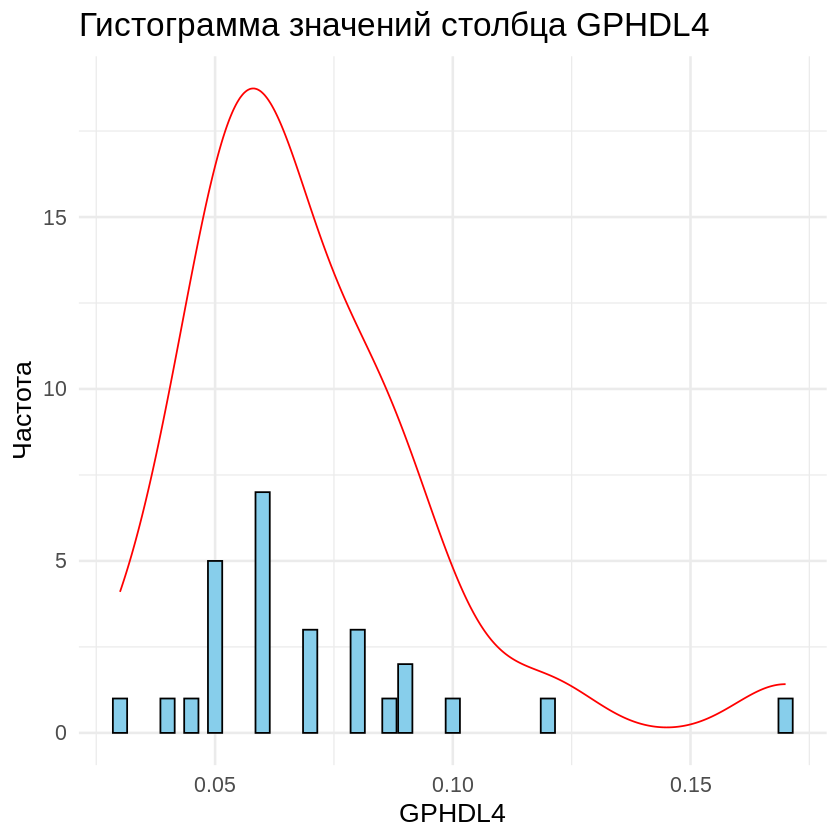

In [63]:
plot_histogram(data, "GPHDL4", binwidth = 0.01)

> Гистограмма значений столбца "GPHDL4" дает основание полагать, что в ее основе лежит гамма-распределение.

**Попробуем привести распределение "GPHDL4" к нормальному**

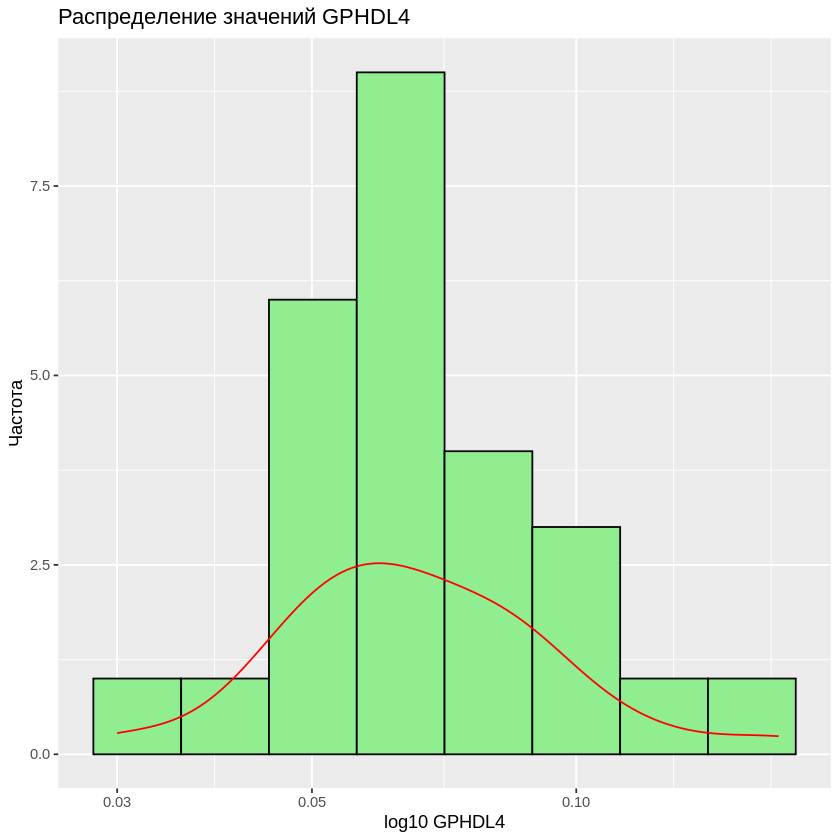

In [64]:
# Удалим пропущенные значения
filtered <- na.omit(data[data$GPHDL4 > 0, ])

ggplot(filtered, aes(GPHDL4)) +
  geom_histogram(binwidth = 0.1, fill = "lightgreen", color = "black") +
  geom_density(color = "red") +
  ggtitle("Распределение значений GPHDL4") +
  scale_x_log10(name = "log10 GPHDL4") +
  scale_y_continuous(name = "Частота")

> Гистограмма теперь выглядит как нормальное распределение. Делаем вывод, что возможно значения в данном столбце имеют лог-нормальное распределение

In [65]:
# Напишем функцию, которая проходит по списку с именами колонок, имеющих не нормальное распределение
# и приводит значения к log10 шкале
plot_histograms_log <- function(data, log_columns, binwidth) {
  for (col_name in log_columns) {
    # Удаление пропущенных значений и значений меньших или равных нулю
    filtered <- na.omit(data[data[[col_name]] > 0, ])

    # Построение гистограммы с логарифмической шкалой по оси x
    hist_plot <- ggplot(filtered, aes_string(x = col_name)) +
      geom_histogram(binwidth = binwidth, fill = "lightgreen", color = "black") +
      geom_density(color = "red") +
      ggtitle(paste("Распределение значений", col_name)) +
      scale_x_log10(name = paste("log10", col_name)) +
      scale_y_continuous(name = "Частота")

    # Печать графика
    print(hist_plot)
  }
}

In [66]:
log_columns = names(select_if(data, is.numeric))

In [67]:
plot_histograms_log(data, log_columns, binwidth = 0.01)

Output hidden; open in https://colab.research.google.com to view.

> После приведения к log10 шкале гистограммы многих непрерывных переменных приобрели вид нормального распределения

### Распределение дискретных переменных

In [69]:
data_factor <- dplyr::select(data, where(is.factor), -Vial.number)
data_factor

Group,Sm,Dm,HT,LVH,IHD,MI,Str,A_C,A_H,A_D,Plaque,Statins
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
0,0,0,0,1,0,0,0,1,1,0,1,1
0,0,0,1,1,0,0,0,0,1,0,1,0
1,0,1,1,1,1,1,0,1,1,0,3,1
1,0,0,0,0,0,0,0,0,0,0,2,0
1,0,0,1,0,1,0,0,1,1,0,1,1
1,0,0,1,1,1,0,0,0,0,0,2,0
1,0,0,0,0,1,0,0,1,0,0,1,0
1,0,0,0,1,1,1,0,0,1,0,1,0
0,0,0,1,0,0,0,0,1,1,1,1,0


**Все категориальные переменные кроме ```Plaque``` имеют биномиальное распределение**

In [70]:
create_barplots <- function(data) {
  factor_columns <- dplyr::select(data, where(is.factor))
  barplots <- list()  # Создаем пустой список для хранения боксплотов
  for (column in colnames(factor_columns)) {
    filtered_data <- na.omit(data)

    # Создаем боксплот и сохраняем его в списке
    barplots[[column]] <- ggplot(filtered_data, aes_string(x = column)) +
      geom_bar(aes(fill = .data[[column]]), color = "black") +
      labs(title = paste("Распределение значений", column),
           x = column,
           y = "Частота") +
      theme_minimal(base_size = 16) +
      theme(plot.title = element_text(size = 20)) +
      scale_fill_brewer(palette = "Set2")  # Выбор цветовой схемы
  }
  return(barplots)  # Возвращаем список барплотов
}

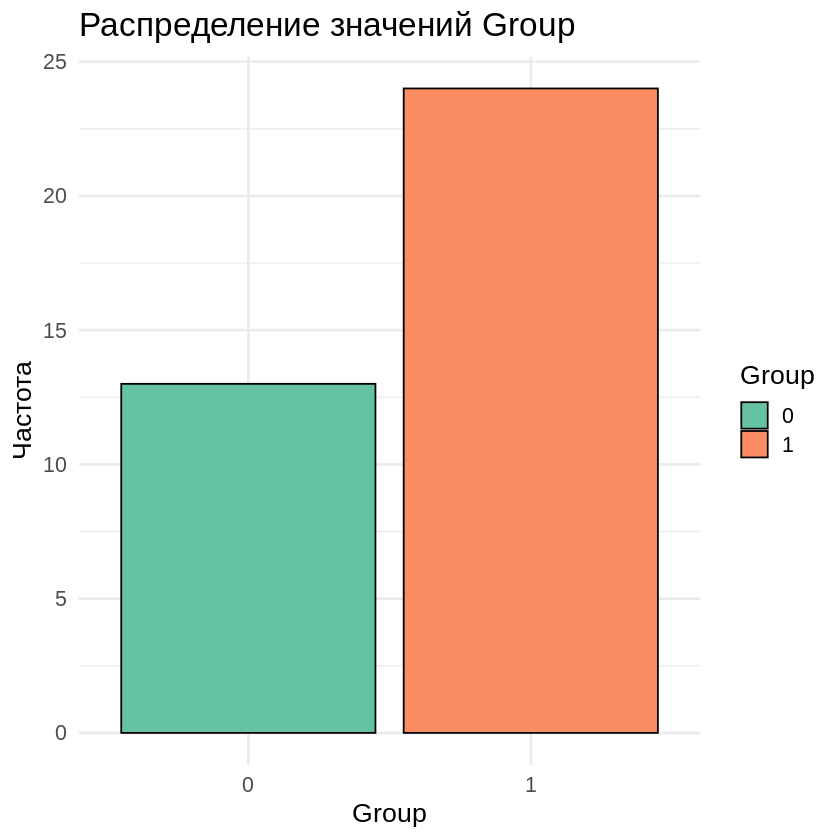

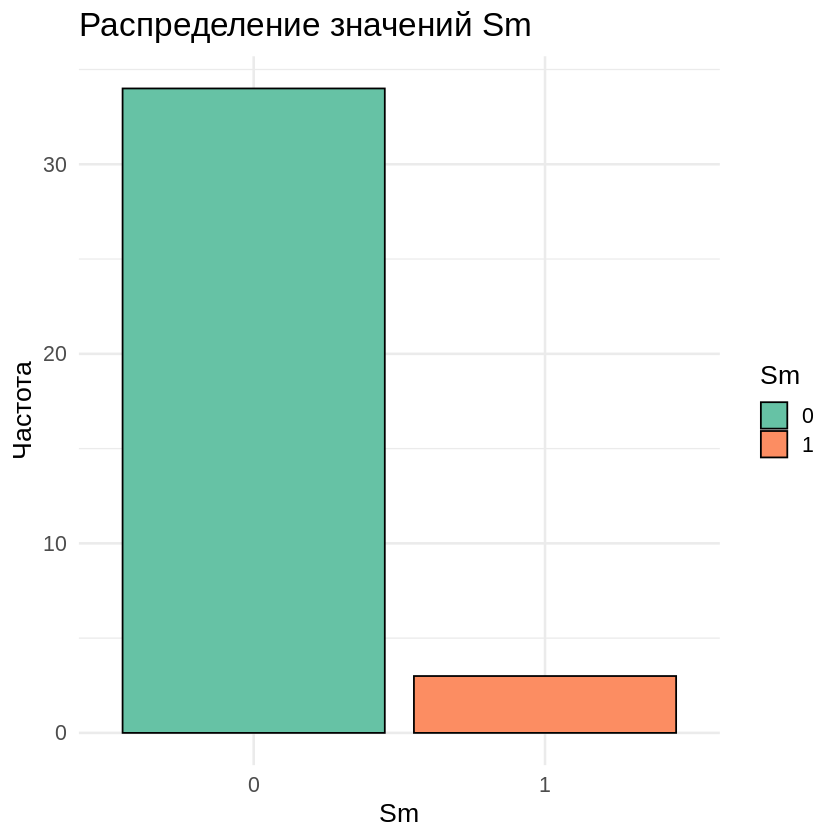

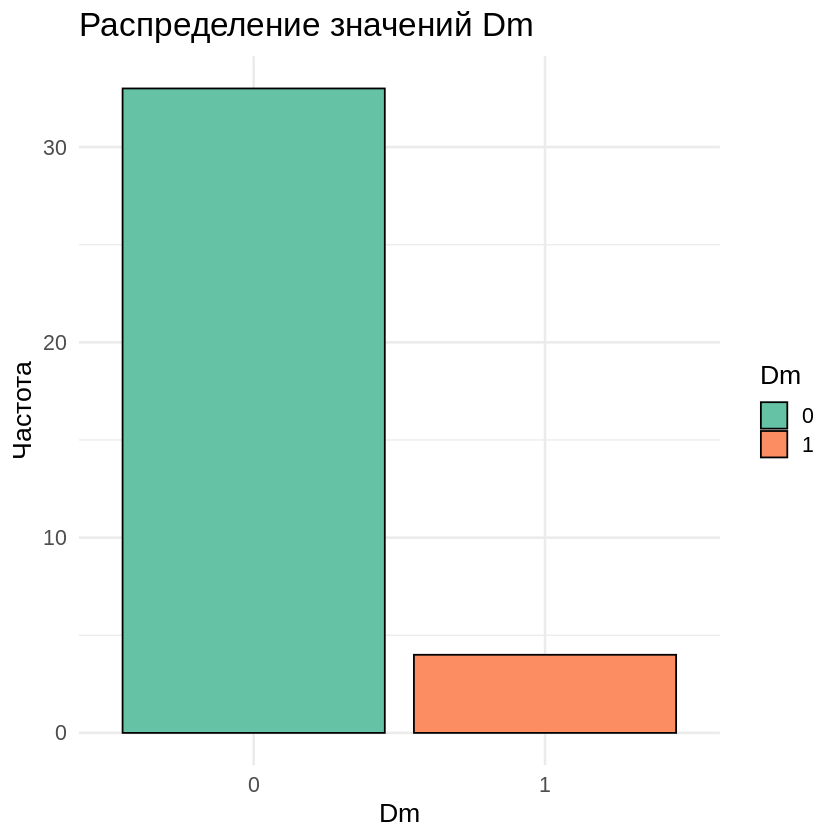

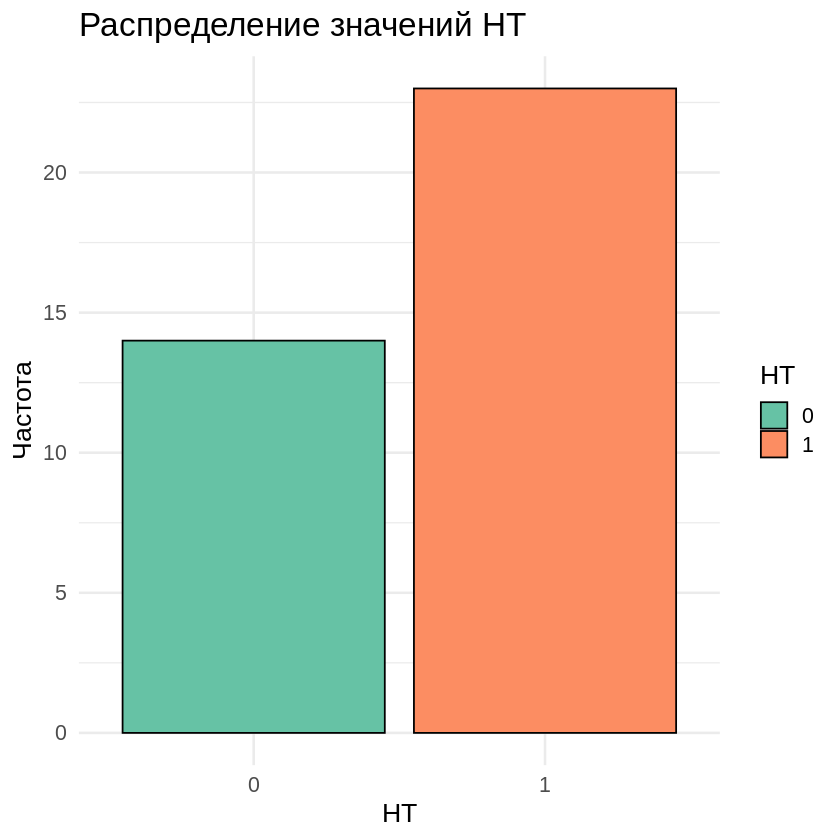

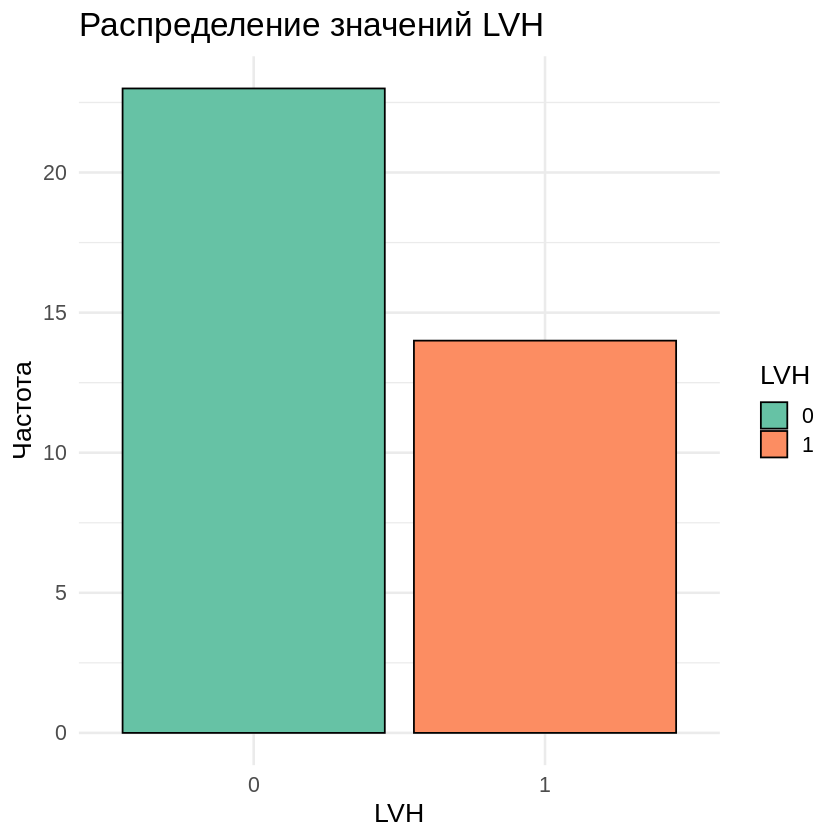

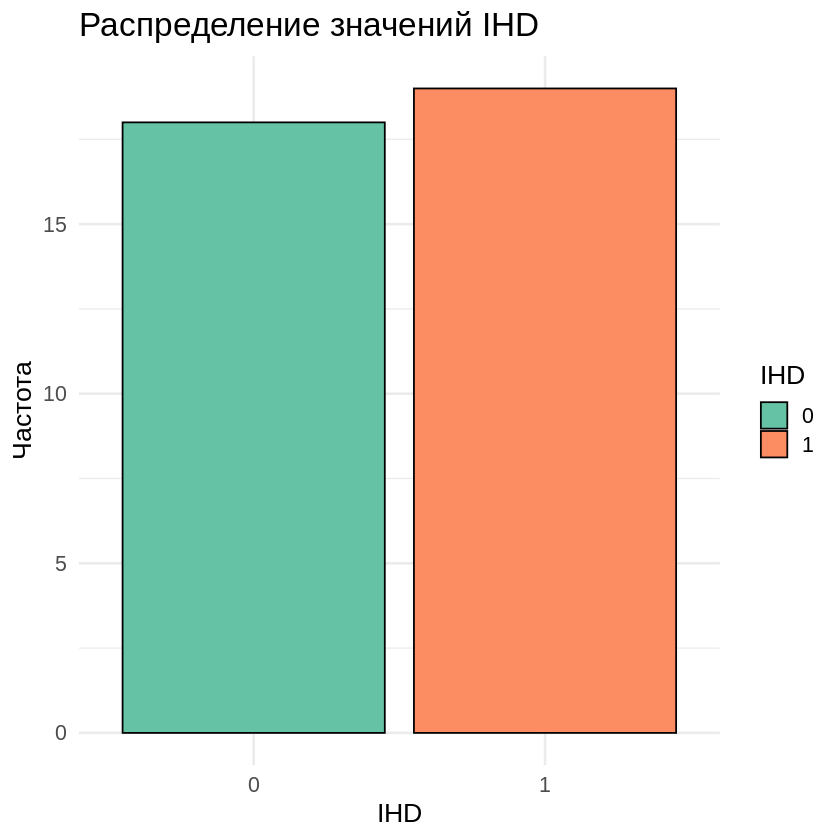

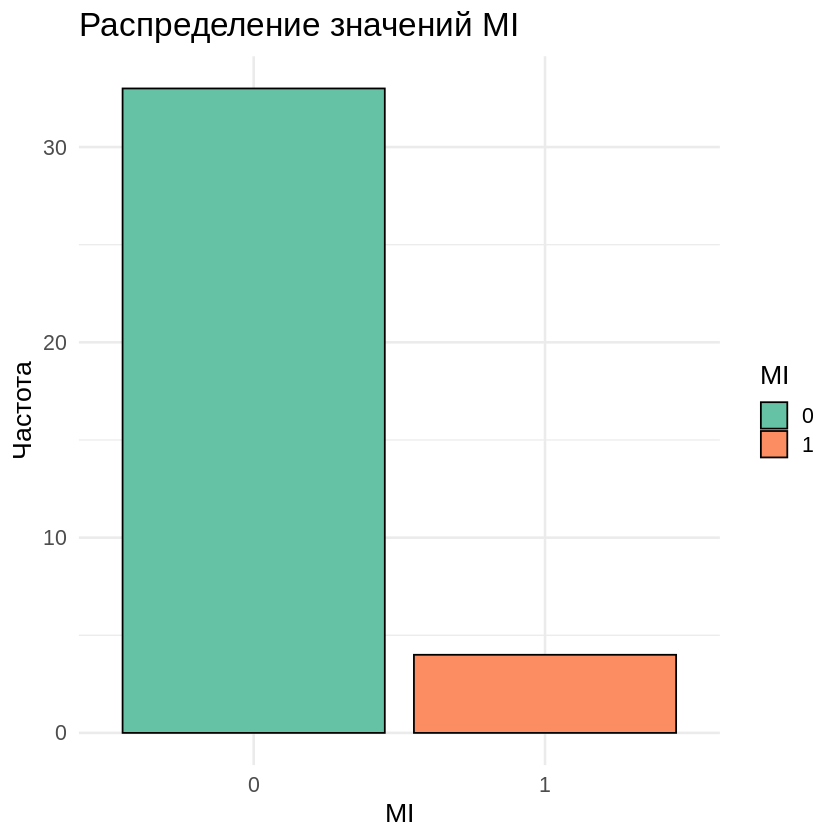

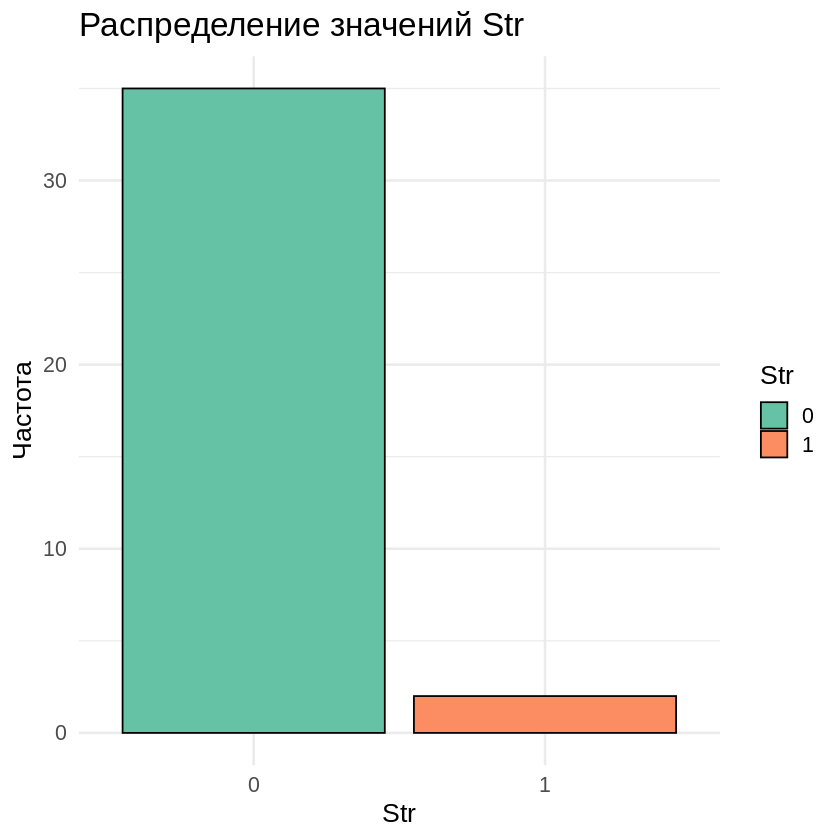

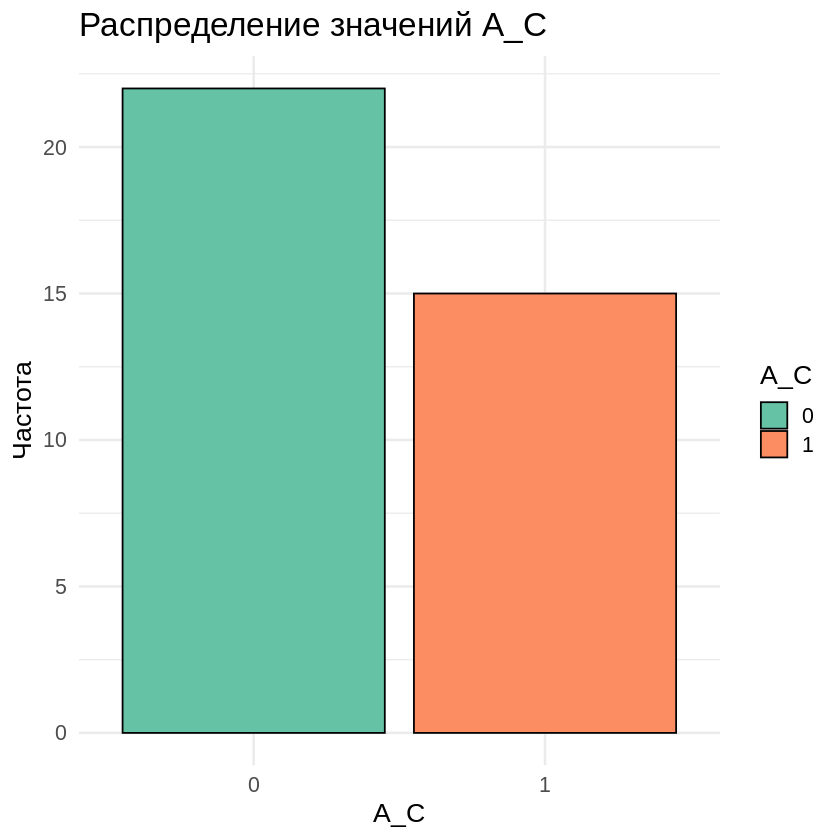

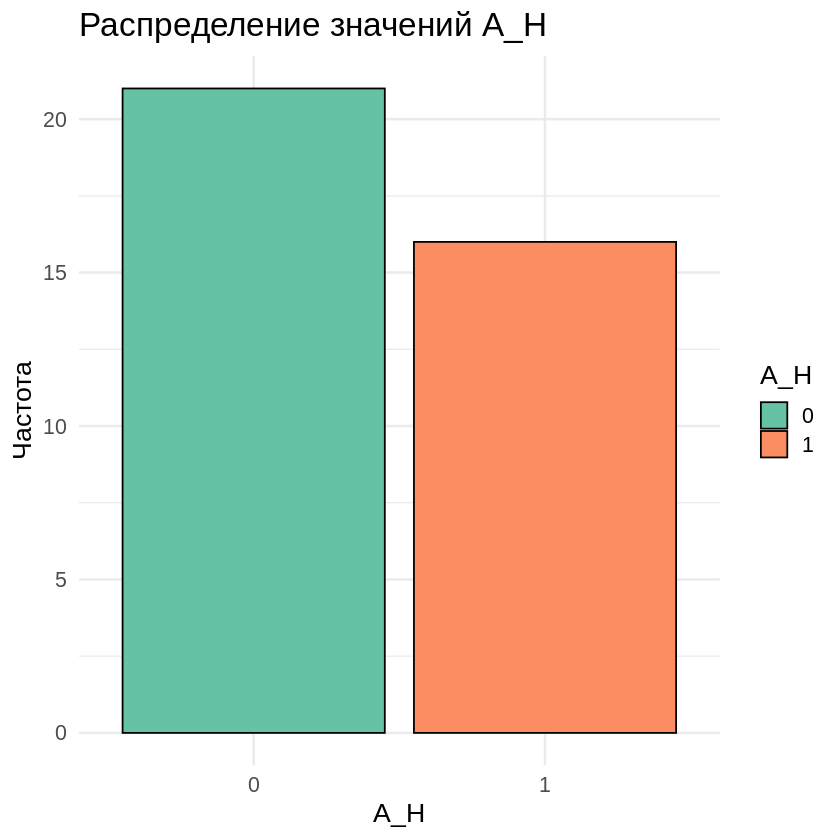

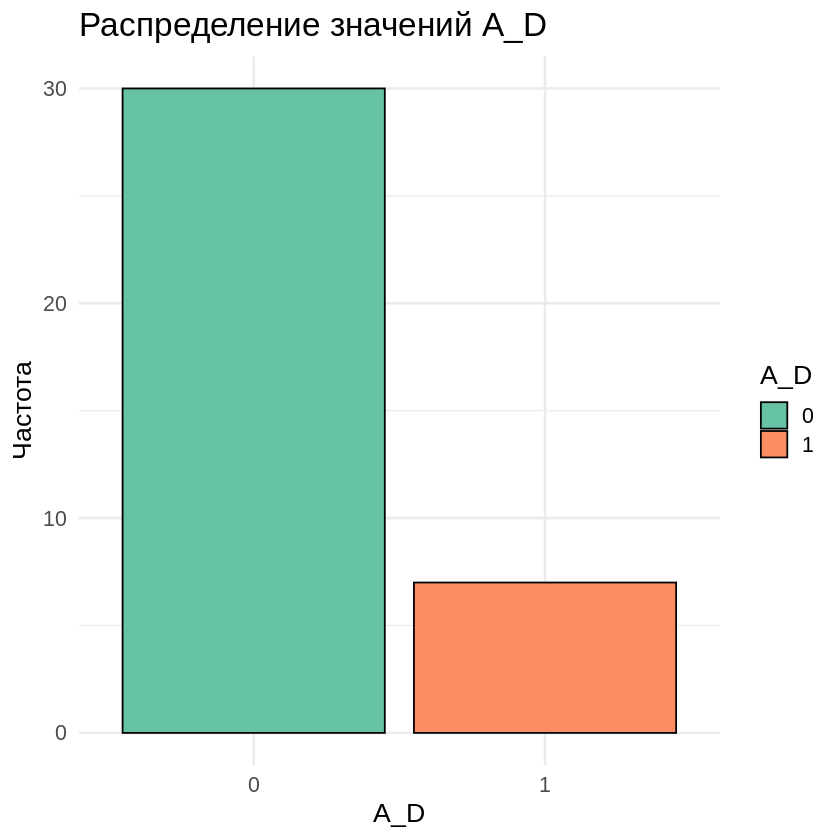

$Group

$Sm

$Dm

$HT

$LVH

$IHD

$MI

$Str

$A_C

$A_H

$A_D

$Plaque

$Statins


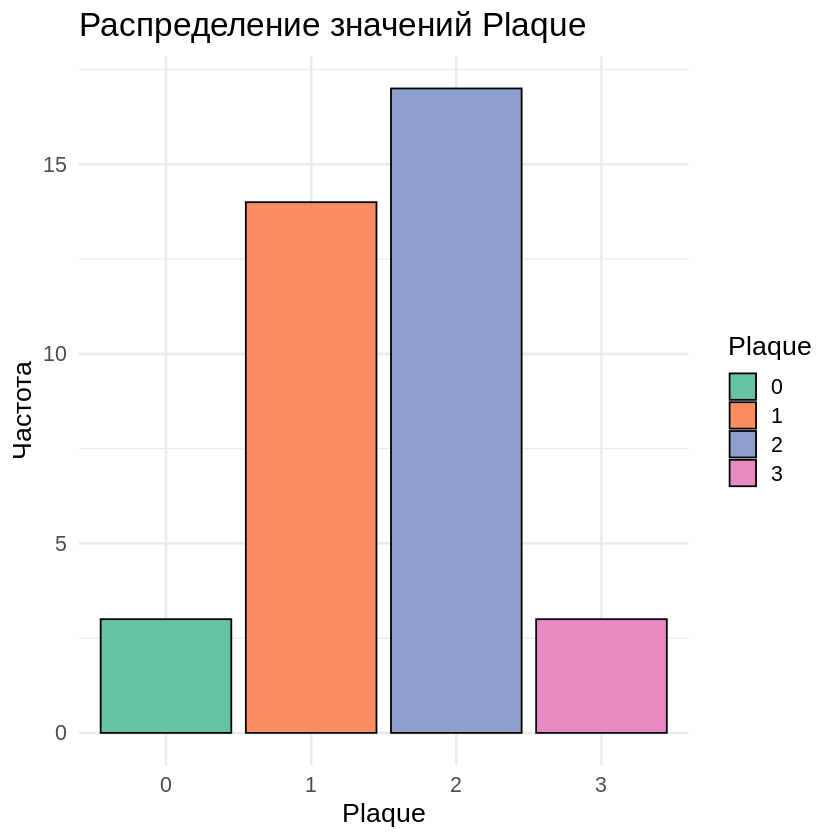

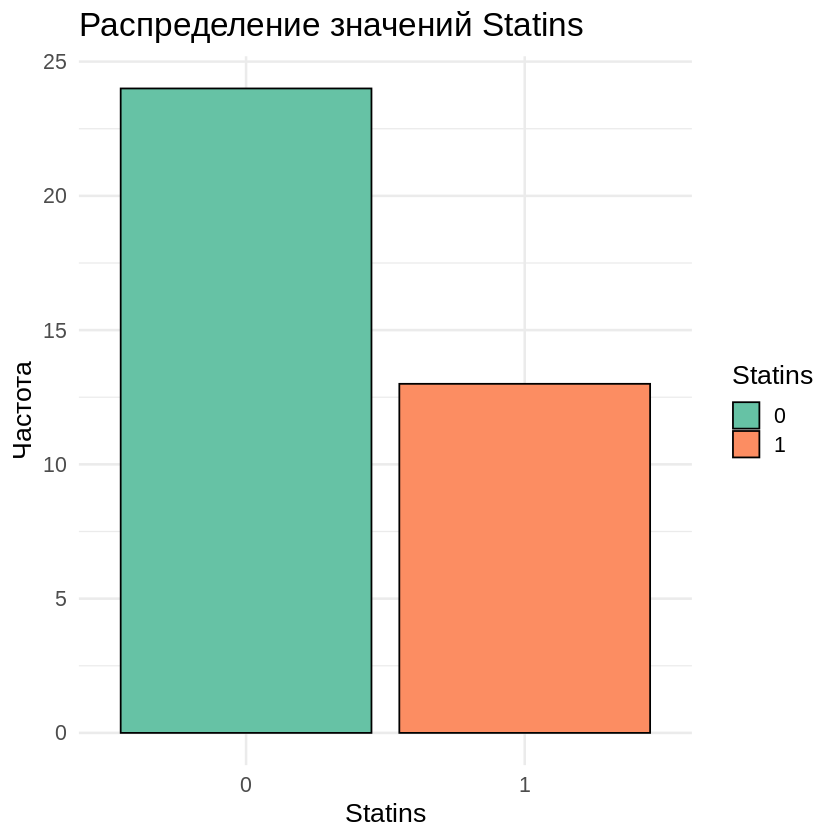

In [71]:
create_barplots(data_factor)

In [73]:
# create_barplots_ <- function(data) {
#   factor_columns <- select(data, where(is.factor))
#   barplots <- list()  # Создаем пустой список для хранения боксплотов
#   for (column in colnames(factor_columns)) {
#     filtered_data <- na.omit(data)

#     # Создаем боксплот и сохраняем его в списке
#     barplots[[column]] <- ggplot(filtered_data, aes_string(x = column)) +
#       geom_bar(aes(fill = .data[[column]]), color = "black", position = "stack") +
#       labs(title = paste("Распределение значений", column),
#            x = column,
#            y = "Частота") +
#       theme_minimal(base_size = 16) +
#       theme(plot.title = element_text(size = 20)) +
#       scale_fill_brewer(palette = "Set2")  # Выбор цветовой схемы
#   }
#   return(barplots)  # Возвращаем список барплотов
# }

In [74]:
# create_barplots_(data_factor)